# This notebook automatically reads in a retrieval summary file and computes the output plots and statistics.
### Evert Nasedkin
### nasedkinevert@gmail.com

It's optimised for HR 8799 retrievals with a particular naming and directory structure, but should be fairly easily generalisable.
The important parameters to update are the retrieval list (list of all retrieval names), data_dir (where the retrievals are stored) and the obs_dir (where the observations are stored).

In [1]:
import sys,os
os.environ['pRT_input_data_path'] = '/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/'
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from spectres import spectres
from astropy.io import fits

from petitRADTRANS.retrieval import plot_style as ps
from petitRADTRANS.retrieval.parameter import Parameter
from petitRADTRANS.retrieval import RetrievalConfig, Retrieval, plot_style
from petitRADTRANS.retrieval.util import gaussian_prior, inverse_gamma_prior
from petitRADTRANS.retrieval.models import  emission_model_diseq,\
                                            guillot_emission,\
                                            emission_model_diseq_simple_patchy_clouds,\
                                            interpolated_profile_emission,\
                                            gradient_profile_emission
from petitRADTRANS import nat_cst as nc
import copy as cp

model_function_dictionary = {}
model_function_dictionary["emission_model_diseq"] = emission_model_diseq
model_function_dictionary["emission_model_diseq_simple_patchy_clouds"] = emission_model_diseq_simple_patchy_clouds
model_function_dictionary["interpolated_profile_emission"] = interpolated_profile_emission
model_function_dictionary["guillot_emission"] = guillot_emission
model_function_dictionary["gradient_profile_emission"] = gradient_profile_emission

species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Using pRT Plotting style!


In [2]:
obs_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/observations/"
data_dir="/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/b_free/"

retrievals = [#"HR8799b_23_v01_free_all_correctos_clear_0nodes_v2",
              #"HR8799b_23_v01_free_all_correctos_clear_1nodes_v2",
              #"HR8799b_23_v01_free_all_correctos_clear_2nodes_v2",
              #"HR8799b_23_v01_free_all_correctos_clear_3nodes_v2",
              #"HR8799b_23_v01_free_all_correctos_clear_4nodes_v2",
              #"HR8799b_23_v01_free_all_correctos_clear_5nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_6nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_7nodes_v2"]

#retrievals = ["HR8799e_23_v01_diseq_all_eqFeMgCloud"]
#ret_num = 0

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'D_pl': 3.085677581305729e+19, 'log_prior_weight': 0.0, 'nnodes': 6}
species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Inte

/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/radtrans.py:121: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  FutureWarning)


  Read line opacities of H2O_Exomol...
 Done.
  Read line opacities of CH4...
 Done.
  Read line opacities of CO2...
 Done.
  Read line opacities of HCN...
 Done.
  Read line opacities of H2S...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.

Setting up AMR pressure grid.
  Read line opacities of H2O_Exomol...
 Done.
  Read line opacities of CH4...
 Done.
  Read line opacities of CO2...
 Done.
  Read line opacities of HCN...
 Done.
  Read line opacities of H2S...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.

Setting up AMR pressure grid.
  Read line opacities of H2O_Exomol_R_40...
 Done.
  Read line opacities of CO_all_iso_HITEMP_R_40...
 Done.
  Read line opacities of CH4_R_40...
 Done.
  Read line opacities of CO2_R_40...
 Done.
  Read line opacities of HCN_R_40...
 Done.
  Read line opacities of H2S_R_40...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.

Setting up AMR pressure

/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/retrieval/retrieval.py:1865: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/retrieval/retrieval.py:1867: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.output_dir + 'evaluate_' + self.rd.retrieval_name + '/' + self.retrieval_name + '_' + mode + '_spec.pdf')



Plotting PT profiles


/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/retrieval/retrieval.py:1867: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.output_dir + 'evaluate_' + self.rd.retrieval_name + '/' + self.retrieval_name + '_' + mode + '_spec.pdf')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


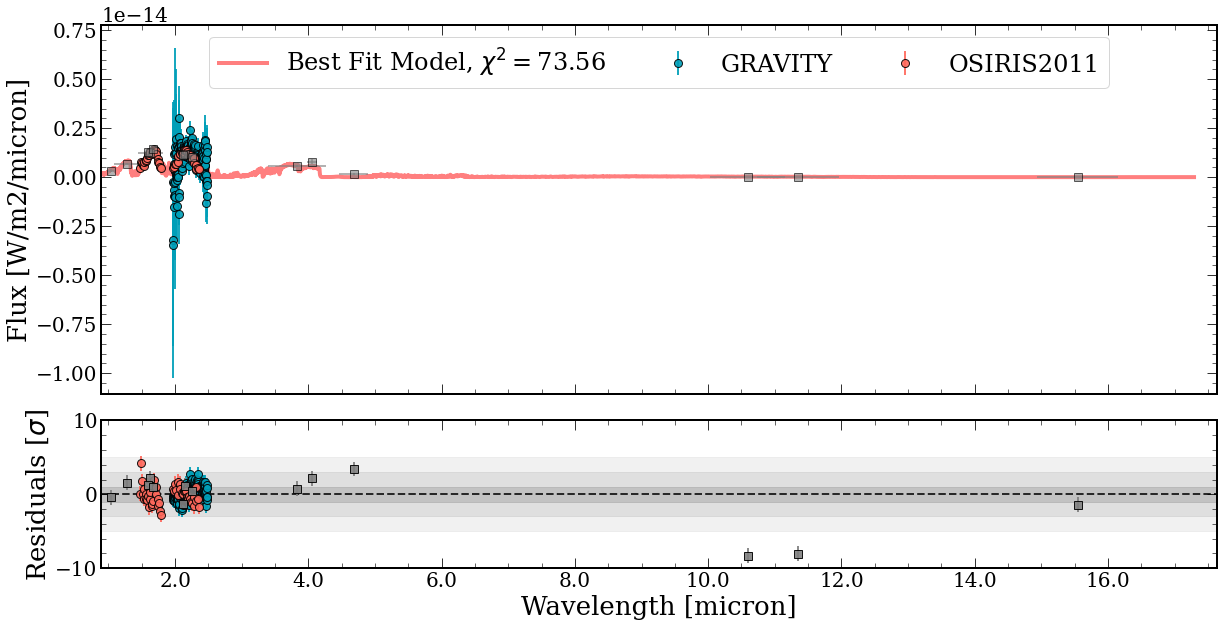

In [4]:
for ret in retrievals:
    amr = True
    scattering = True
    pressures = np.logspace(-6,3,80)
    if "clear" in ret:
        amr = False,
        scattering = False
        pressures = np.logspace(-6,3,100)
    RunDefinition = RetrievalConfig(retrieval_name = ret, # Give a useful name for your retrieval
                                    run_mode = "evaluate", # 'retrieval' to run, or 'evaluate' to make plots
                                    pressures = pressures,
                                    AMR = amr,             # Adaptive mesh refinement, slower if True
                                    scattering = scattering)      # Add scattering for emission spectra clouds
    try:
        sumfile = list(open(data_dir + 'evaluate_' + ret + '/' + ret + '_ret_summary.txt', 'r'))
    except:
        continue
    data_start = False
    free_param_start = False
    fixed_param_start = False

    data_dict = {}
    free_param_list = []
    fixed_param_dict = {}
    current_name = None
    for i,line in enumerate(sumfile):
        if line.strip() == "":
            continue
        if line.strip() == "Data":
            data_start = True
            free_param_start = False
            continue
        if "Multinest Outputs" in line:
            data_start = False
            continue
        if "Best Fit" in line:
            data_start = False
        if "Free Parameters" in line:
            free_param_start = True
            fixed_param_start = False
            continue
        if "Fixed Parameters" in line:
            fixed_param_start = True
            continue

        if free_param_start:
            param, bounds = line.split("=")
            param = param.replace('\n',"").strip()
            free_param_list.append(param)
            continue

        if fixed_param_start:
            param, val = line.split("=")
            param = param.strip()
            if param == "nnodes":
                fixed_param_dict[param] = int(float(val.replace('\n',"").strip()))
                continue
            fixed_param_dict[param] = float(val.replace('\n',"").strip())
            continue

        if data_start:
            if not line[0]==" ":
                instrument = line.replace('\n',"")
                data_dict[instrument] = {}
                data_dict[instrument]["path"] = None
                data_dict[instrument]["data resolution"] = None
                data_dict[instrument]["model resolution"] = None
                data_dict[instrument]["scale factor"] = False
                data_dict[instrument]["scale err"] = False
                data_dict[instrument]["photometry"] = False
                current_name = instrument
                continue
            if "HR8799_2023_Retrievals" in line:
                obsfile = line.split("/")[-1].strip()
                data_dict[current_name]["path"] = obs_dir + obsfile
                continue
            param,val = line.split("=")
            param = param.strip()
            param = param.replace('\n',"")
            if param == "Model Function":
                data_dict[current_name][param] = model_function_dictionary[val.strip()]
                continue
            if param == "photometric width":
                low,high = val.split("--")
                low = float(low)
                high = float(high.split("um")[0])
                data_dict[current_name][param] = [low,high]
                continue
            if param == "Photometric transform function":
                data_dict[current_name]["photometry"] = True
                continue
            if param == "model resolution":
                data_dict[current_name][param] = int(val.strip())
                continue
            if "scale" in param:
                data_dict[current_name]["scale factor"] = True
                data_dict[current_name]["scale err"] = True
                continue
            data_dict[current_name][param] = float(val.strip())
    print(fixed_param_dict)
    for key, val in data_dict.items():
        if not 'Model Function' in val.keys():
            print(key,val)
            sys.exit(1)
        if not val["photometry"]:
            distance = 10*nc.pc
            if key == "GRAVITY" or key=="ALES":
                distance = 41.2925*nc.pc
            RunDefinition.add_data(key,
                                val["path"],
                                data_resolution = val["data resolution"],
                                external_pRT_reference = None,
                                distance = distance,
                                scale = val["scale factor"],
                                scale_err = val["scale err"],
                                offset_bool= False,
                                model_generating_function = val["Model Function"])
            if distance != 10*nc.pc:
                RunDefinition.data[key].scale_to_distance(10.0*nc.pc)
            if key == "OSIRIS2011":
                RunDefinition.data['OSIRIS2011'].flux = 3e-12*RunDefinition.data['OSIRIS2011'].flux*1e-3/(RunDefinition.data['OSIRIS2011'].wlen)**2
                RunDefinition.data['OSIRIS2011'].flux_error = 3e-12*RunDefinition.data['OSIRIS2011'].flux_error*1e-3/(RunDefinition.data['OSIRIS2011'].wlen)**2
                RunDefinition.data['OSIRIS2011'].covariance = None
            if key == "OSIRIS" and "HR8799c" in ret:
                newwlens = RunDefinition.data['OSIRIS'].wlen[1:-4:6]
                newflux, newerr = spectres(newwlens,
                                        RunDefinition.data['OSIRIS'].wlen,
                                        RunDefinition.data['OSIRIS'].flux,
                                        RunDefinition.data['OSIRIS'].flux_error,
                                        fill=np.nan)

                RunDefinition.data['OSIRIS'].wlen = newwlens[~np.isnan(newflux)]
                RunDefinition.data['OSIRIS'].flux = newflux[~np.isnan(newflux)]
                RunDefinition.data['OSIRIS'].flux_error = np.sqrt(newflux[~np.isnan(newflux)])

                RunDefinition.data['OSIRIS'].wlen_bins = np.zeros_like(RunDefinition.data['OSIRIS'].wlen)
                RunDefinition.data['OSIRIS'].wlen_bins[:-1] = np.diff(RunDefinition.data['OSIRIS'].wlen)
                RunDefinition.data['OSIRIS'].wlen_bins[-1] = RunDefinition.data['OSIRIS'].wlen_bins[-2]
                RunDefinition.data['OSIRIS'].update_covariance_from_flux_error()
            if key == "SPHEREYJH" and "HR8799d" in ret:
                sphere_data_cut =-5
                RunDefinition.data["SPHEREYJH"].flux = RunDefinition.data["SPHEREYJH"].flux[:sphere_data_cut]
                RunDefinition.data["SPHEREYJH"].wlens = RunDefinition.data["SPHEREYJH"].wlens[:sphere_data_cut]
                RunDefinition.data["SPHEREYJH"].flux_error = RunDefinition.data["SPHEREYJH"].flux_error[:sphere_data_cut]
                RunDefinition.data["SPHEREYJH"].covariance = RunDefinition.data["SPHEREYJH"].covariance[:sphere_data_cut,:sphere_data_cut]
                RunDefinition.data["SPHEREYJH"].inv_cov = np.linalg.inv(RunDefinition.data["SPHEREYJH"].covariance)
                sign, RunDefinition.data["SPHEREYJH"].log_covariance_determinant = np.linalg.slogdet(2.0 * np.pi * RunDefinition.data["SPHEREYJH"].covariance)
        else:
            RunDefinition.add_photometry(val["path"],
                                model_generating_function = val["Model Function"],
                                model_resolution = 40 )
    for key, val in fixed_param_dict.items():
         RunDefinition.add_parameter(name = key, free = False, value = val)
    #################################################
    # Add parameters, and priors for free parameters.
    #################################################
    print(free_param_list)
    for param in free_param_list:
        RunDefinition.add_parameter(param, True,transform_prior_cube_coordinate = lambda x : x)
    # This run uses the model of Molliere (2020) for HR8799e
    # Check out models.py for a description of the parameters.

    #######################################################
    # Define species to be included as absorbers
    #######################################################
    RunDefinition.set_rayleigh_species(['H2', 'He'])
    RunDefinition.set_continuum_opacities(['H2-H2', 'H2-He'])
    if "Fe/H" in free_param_list:
        RunDefinition.set_line_species(['H2O_Exomol', 'CO_all_iso_HITEMP', 'CH4', 'CO2', 'NH3', 'HCN',\
                                'H2S', 'FeH', 'PH3', 'Na_allard', 'K_allard', 'TiO_all_Exomol', 'VO','SiO'],
                               eq=True)
    else:
        lines = ['H2O_Exomol','CO_all_iso_HITEMP','CH4', 'CO2', 'HCN', 'H2S', 'NH3']
        lines_use = []
        for param in free_param_list:
            if param in lines:
                lines_use.append(param)
        RunDefinition.set_line_species(lines_use, eq=False)
    for param in free_param_list:
        if "eq_scaling" in param:
            tag = "_cd"
            if "Mg" in param:
                if "amCloud" in ret:
                    tag="_ad"
                if ret == "HR8799e_23_v02_diseq_all_eqFeMgCloud_newphot_newSPHGPI_mrprior_grad_fseds_hansen":
                    tag = "_ad"
            RunDefinition.add_cloud_species(f"{param.split('_')[-1]}{tag}",eq = True,scaling_factor = (-2.5,4.5))
            continue
        if "log_X_cb" in param:
            tag = "_cd"
            if "Mg" in param:
                if "amCloud" in ret:
                    tag="_ad"
                if ret == "HR8799e_23_v02_diseq_all_eqFeMgCloud_newphot_newSPHGPI_mrprior_grad_fseds_hansen":
                    tag = "_ad"
            RunDefinition.add_cloud_species(f"{param.split('_')[-1]}{tag}", eq = False, abund_lim = (-6.5,0.0), PBase_lim=(-6,3))

    for key, value in RunDefinition.parameters.items():
        value.plot_in_corner = True
        value.corner_label = key.replace('_',' ')


    ##################################################################
    # Define axis properties of spectral plot if run_mode == 'evaluate'
    ##################################################################
    RunDefinition.plot_kwargs["spec_xlabel"] = 'Wavelength [micron]'

    RunDefinition.plot_kwargs["spec_ylabel"] = "Flux [W/m2/micron]"
    RunDefinition.plot_kwargs["y_axis_scaling"] = 1.0
    RunDefinition.plot_kwargs["xscale"] = 'linear'
    RunDefinition.plot_kwargs["yscale"] = 'linear'
    RunDefinition.plot_kwargs["resolution"] = None#80.
    RunDefinition.plot_kwargs["nsample"] = 400.

    ##################################################################
    # Define from which observation object to take P-T
    # in evaluation mode (if run_mode == 'evaluate'),
    # add PT-envelope plotting options
    ##################################################################
    if "GRAVITY" in data_dict.keys():
        RunDefinition.plot_kwargs["take_PTs_from"] = 'GRAVITY'
    else:
        RunDefinition.plot_kwargs["take_PTs_from"] = list(data_dict.keys())[0]
    RunDefinition.plot_kwargs["temp_limits"] = [50, 3000]
    RunDefinition.plot_kwargs["press_limits"] = [1e2, 1e-5]

    ##################################################################
    # Run the Retrieval
    ##################################################################
    retrieval = Retrieval(RunDefinition,
                        output_dir = data_dir,
                        sample_spec = False,
                        ultranest = False,
                        test_plotting = False)
    #retrieval.plot_data()
    retrieval.run(n_live_points = 4000,
            sampling_efficiency=0.8,
            const_efficiency_mode=False,
            resume = True)
    #retrieval.plot_all(contribution = True, mode = 'median')
    sample_dict, parameter_dict = retrieval.get_samples(retrieval.output_dir)
    samples_use = cp.copy(sample_dict[retrieval.retrieval_name])

    sample_use_dict = {}
    if samples_use.shape[0]>30000 and len(free_param_list) > 16:
        inds = np.random.randint(0,samples_use.shape[0],30000)
        samples_binned = samples_use[inds]
        sample_use_dict[ret] = samples_binned
    else:
        sample_use_dict[ret] = samples_use
    parameters_read = parameter_dict[retrieval.retrieval_name]
    retrieval.plot_spectra(samples_use, parameters_read, refresh=True, mode = "median")

    retrieval.plot_PT(sample_dict, parameters_read, contribution = False, refresh=True, mode = "median")
    retrieval.plot_corner(sample_use_dict, parameters_dict,  refresh=False, mode = "median")
    retrieval.plot_contribution(samples_use, parameters_read, refresh=False, mode = "median")
    retrieval.plot_abundances(samples_use, parameters_read, refresh=False, mode = "median")

    retrieval.plot_spectra(samples_use, parameters_read, refresh=True, mode = "bestfit")

    if samples_use.shape[0]<3:
        continue
    logl,bfind = retrieval.get_best_fit_likelihood(samples_use)
    bf_pars = retrieval.get_max_likelihood_params(samples_use[bfind],parameters_read)
    red_chi2 = retrieval.get_reduced_chi2(samples_use[bfind],subtract_n_parameters=True)
    chi2 = retrieval.get_reduced_chi2(samples_use[bfind],subtract_n_parameters=False)
    evidence = retrieval.get_evidence()
    myfile = retrieval.output_dir + ret + "_ShortStats.txt"
    print(myfile)
    with open(myfile, 'w') as f:
        f.write(f"#{retrieval.retrieval_name}\n")
        f.write(f"ll, {logl}\n")
        f.write(f"chi2, {chi2}\n")
        f.write(f"chi2/nu, {red_chi2}\n")
        f.write(f"logZ, {evidence}")




/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Starting retrieval HR8799e_23_v01_diseq_all_eqFeMgCloudSetting up PRT Objects
Emission scattering is enabled: enforcing test_ck_shuffle_comp = True
  Read line opacities of H2O_Exomol...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.

Setting up AMR pressure grid.
Best fit likelihood = 13090.30
Best fit 𝛘^2 = -8548.94
Best fit 𝛘^2/DoF = -36.69


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


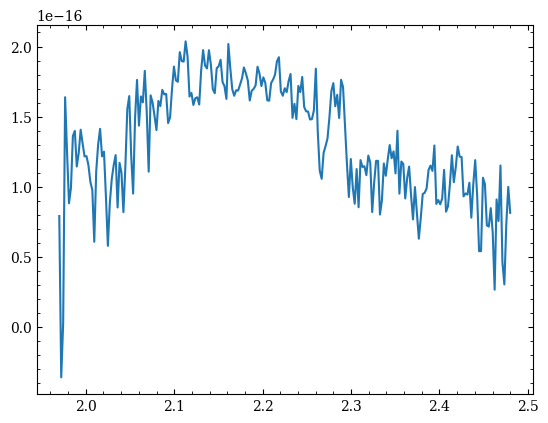